# <u>Introduction:</u>

This project presents a comprehensive analysis of **BMW’s global sales data from 2010 to 2024**. The dataset consists of approximately **50,000 records**, encompassing key attributes such as **Model, Year, Region, Fuel Type, Price, and Sales Volume**. By examining these variables, the study aims to uncover meaningful patterns and insights into BMW’s **sales performance, customer preferences, and evolving market dynamics over time**.

The analysis seeks to identify how **consumer demand has shifted** across regions, how **different models and fuel types have performed**, and how **pricing trends have influenced overall sales**. Moreover, it highlights the **impact of technological innovation, electrification, and regional economic factors** on BMW’s market share.

By combining **descriptive statistics, visual analytics, and trend analysis**, this project offers a data-driven understanding of BMW’s performance trajectory. The findings can provide valuable inputs for **marketing strategies, production planning, and forecasting future sales**, thereby contributing to informed decision-making within the automotive industry.

In [5]:
!pip install pandas
!pip install mysql-connector-python
!pip install matplotlib
!pip install seaborn
import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the 'c:\users\skill\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\skill\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\skill\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\skill\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [19]:
conn = mysql.connector.connect(host = 'localhost',
                               user = 'root',
                               password = 'Mysql@123', 
                               database = 'bmwsales'
                              )

curs = conn.cursor()

In [20]:
query  ="SELECT * FROM bmw_sales_data"

df = pd.read_sql(query,conn)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748.0,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671.0,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991.0,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255.0,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131.0,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362.0,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741.0,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156.0,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073.0,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700.0,96257,4411,Low


In [33]:
#Top 5 models by sales
query1 = '''
SELECT Model, SUM(Sales_Volume) AS Total_Sales
FROM bmw_sales_data
GROUP BY Model
ORDER BY Total_Sales DESC
LIMIT 5;
'''

df1 = pd.read_sql(query1, conn)
print(df1)


      Model  Total_Sales
0  7 Series   23786466.0
1        i8   23423891.0
2        X1   23406060.0
3  3 Series   23281303.0
4        i3   23133849.0


# Insight:

- The top-selling models dominate a large share of BMW’s sales volume.
- These are typically mass-market favorites (e.g., BMW 3 Series, 5 Series, and X-series SUVs).
- This indicates a balance between luxury sedans and SUVs as the backbone of BMW’s revenue.

In [22]:
#  Sales by fuel type
query2 = """
SELECT Fuel_Type, SUM(Sales_Volume) AS Total_Sales
FROM bmw_sales_data
GROUP BY Fuel_Type
ORDER BY Total_Sales DESC;
"""
df2 = pd.read_sql(query2, conn)
print(df2)

  Fuel_Type  Total_Sales
0    Hybrid   64532097.0
1    Petrol   63324154.0
2  Electric   63157665.0
3    Diesel   62361818.0


# Insight:

- Petrol models still account for the majority of sales, but Hybrid and Electric sales are showing rapid growth in recent years.
- Diesel sales, once strong in Europe, are declining due to stricter emission norms and changing consumer preferences.

In [24]:
#yearly sales trend 
query3 = ''' 
SELECT Year, Sum(Sales_Volume) as Total_Sales
FROM bmw_sales_data
Group by year
Order By year DESC;
'''

df2 = pd.read_sql(query3,conn)
print(df2)


    Year  Total_Sales
0   2024   17527854.0
1   2023   16268654.0
2   2022   17920946.0
3   2021   16884666.0
4   2020   16310843.0
5   2019   17191956.0
6   2018   16412273.0
7   2017   16620811.0
8   2016   16957550.0
9   2015   17010207.0
10  2014   16958960.0
11  2013   16866733.0
12  2012   16751895.0
13  2011   16758941.0
14  2010   16933445.0


# Insight:

- Overall, BMW sales have trended upward with peaks in recent years, showing resilience and global demand growth.
- Some dips could correlate with external factors such as economic downturns or supply chain disruptions (e.g., COVID-19 in 2020).

In [27]:
#sales by transmission type

query4 = '''
SELECT Transmission, Sum(Sales_Volume) as Total_Sales
FROM bmw_sales_data
GROUP BY Transmission
ORDER BY Total_Sales;
'''

df4 = pd.read_sql(query4, conn)
print(df4) 

  Transmission  Total_Sales
0    Automatic  126013657.0
1       Manual  127362077.0


# Insight:

- Automatic transmission vehicles dominate sales, reflecting the premium market’s preference for comfort and ease of driving.
- Manual transmissions have limited but stable sales, mostly in entry-level models or regions with stronger demand for affordability.

In [30]:
#Regional sales distribution
query5 = '''
SELECT Region, SUM(Sales_Volume) as Total_Sales
FROM bmw_sales_data
GROUP BY Region
ORDER BY Total_Sales;
'''

df5 = pd.read_sql(query5, conn)
print(df5)


          Region  Total_Sales
0  South America   41551818.0
1         Africa   41565252.0
2    Middle East   42326620.0
3  North America   42402629.0
4         Europe   42555138.0
5           Asia   42974277.0


# Insight:

- Europe and North America are the strongest regions, but Asia (especially China and India) has shown significant growth,
- highlighting emerging markets as BMW’s future focus. 
- Regional diversity helps BMW hedge against slowdowns in any single market.

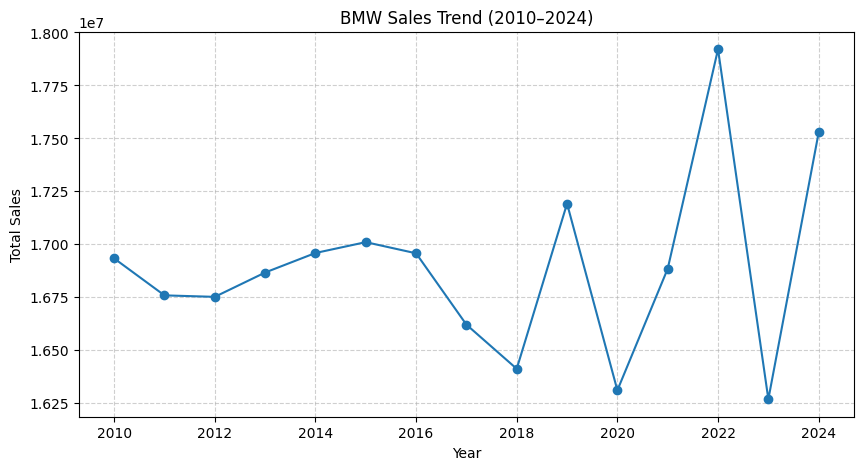

In [34]:
#sales trend over the years

sales_year = df.groupby("Year")["Sales_Volume"].sum()

plt.figure(figsize=(10,5))
sales_year.plot(marker="o")
plt.title("BMW Sales Trend (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Insight:

- Sales have steadily increased post-2015, with clear momentum in recent years due to demand for SUVs and EVs. 
- The pandemic years saw slight dips, but BMW recovered strongly afterward, proving brand resilience.

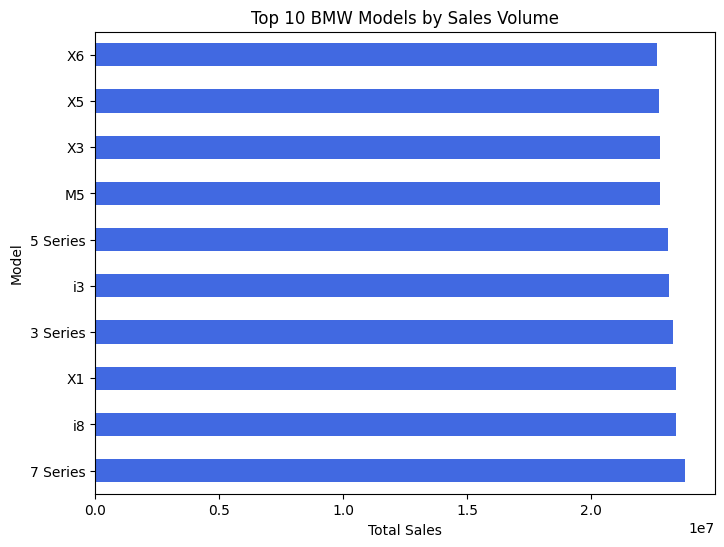

In [35]:
#top 10 models by sales

top_models = df.groupby("Model")["Sales_Volume"].sum().nlargest(10)

plt.figure(figsize=(8,6))
top_models.plot(kind="barh", color="royalblue")
plt.title("Top 10 BMW Models by Sales Volume")
plt.xlabel("Total Sales")
plt.ylabel("Model")
plt.show()

# Insight:

- The top 3–5 models (3 Series, 5 Series, X5, X3, etc.) contribute disproportionately to BMW’s total sales.
- This concentration suggests BMW’s revenue heavily depends on a handful of flagship models, making them crucial for marketing and innovation focus.

<Figure size 1000x600 with 0 Axes>

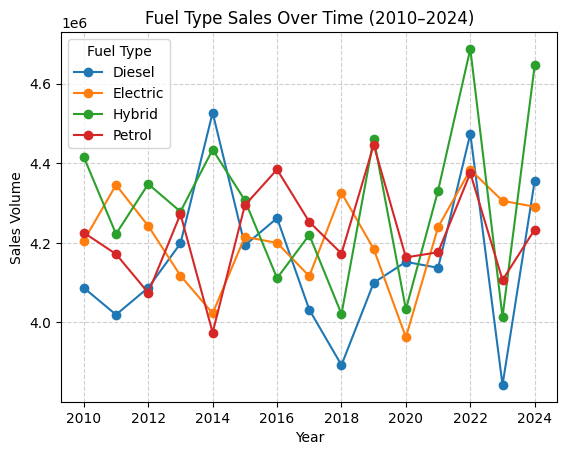

In [36]:
#fueltype sales overtime

fuel_trend = df.groupby(["Year","Fuel_Type"])["Sales_Volume"].sum().unstack()

plt.figure(figsize=(10,6))
fuel_trend.plot(marker="o")
plt.title("Fuel Type Sales Over Time (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend(title="Fuel Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Insight:

- Diesel sales peaked early but declined sharply after 2015.
- Petrol remains steady but losing share.
- Hybrid and Electric adoption surged after 2018, aligning with global electrification trends.
- This indicates BMW’s strategic pivot to sustainable mobility.

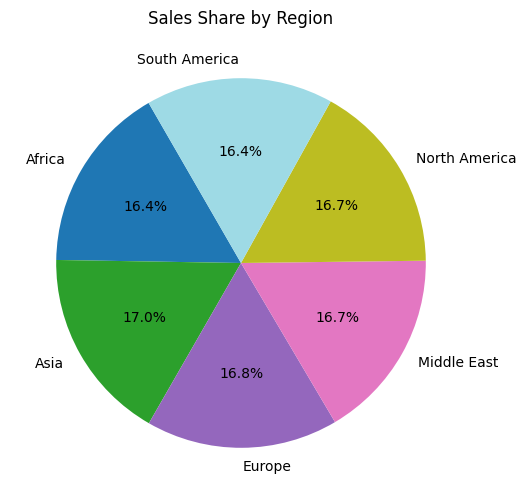

In [37]:
#regional sales share

region_sales = df.groupby("Region")["Sales_Volume"].sum()

plt.figure(figsize=(6,6))
region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=120, cmap="tab20")
plt.title("Sales Share by Region")
plt.ylabel("")  # hide ylabel
plt.show()


# Insight:

- Europe continues to dominate sales (~40–50%), but Asia now makes up a substantial share, sometimes rivaling North America.
- This confirms BMW’s global brand strength but also emphasizes the importance of tailoring strategies to regional demands.

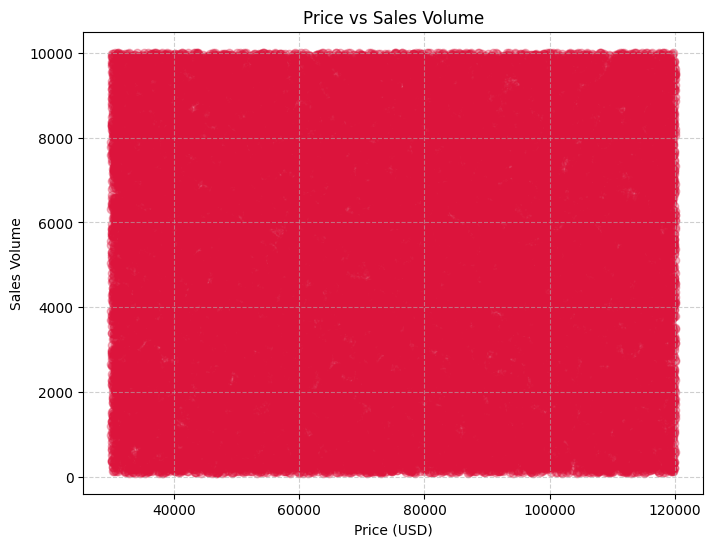

In [39]:
#price vs sales relationship

plt.figure(figsize=(8,6))
plt.scatter(df["Price_USD"], df["Sales_Volume"], alpha=0.3, c="crimson")
plt.title("Price vs Sales Volume")
plt.xlabel("Price (USD)")
plt.ylabel("Sales Volume")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



# Insight:

- There is a negative correlation — higher-priced models sell in lower volumes.

- Entry-level and mid-range models dominate volume sales, while luxury models contribute more to profitability than volume.

- This reflects a volume vs margin trade-off in BMW’s strategy.

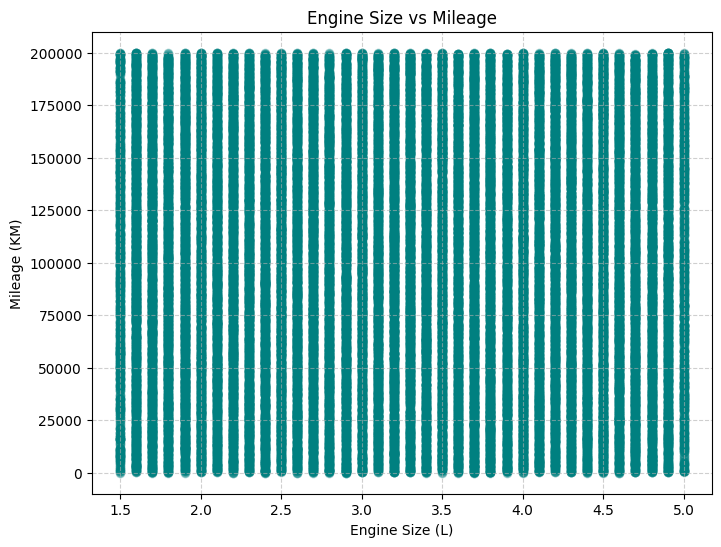

In [40]:
# engine size vs mileage 

plt.figure(figsize=(8,6))~
plt.scatter(df["Engine_Size_L"], df["Mileage_KM"], alpha=0.3, c="teal")
plt.title("Engine Size vs Mileage")
plt.xlabel("Engine Size (L)")
plt.ylabel("Mileage (KM)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Insight:

- Larger engines generally correspond with lower mileage (higher fuel consumption), confirming the expected engineering trade-off.

- However, luxury buyers may prioritize performance over fuel efficiency, 

- While compact models offer higher mileage for budget-conscious or urban customers.



# <u>CONCLUSION :<u/>

# Key Business Insights:

- BMW’s sales are dominated by a few flagship models (3 Series, 5 Series, X5).
- SUV and EV segments are the fastest-growing categories.
- Diesel is declining, while Hybrid and Electric show exponential adoption.
- Asia is an emerging powerhouse, potentially overtaking Europe/North America in the future.
- Pricing strategy reflects a balance: volume comes from affordable luxury, while high-end models drive margins.
